In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

In [3]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

In [4]:
X.shape, X

((100, 50, 1),
 array([[[ 0.        ],
         [ 0.84147098],
         [ 0.90929743],
         ...,
         [ 0.12357312],
         [-0.76825466],
         [-0.95375265]],
 
        [[ 0.84147098],
         [ 0.90929743],
         [ 0.14112001],
         ...,
         [-0.76825466],
         [-0.95375265],
         [-0.26237485]],
 
        [[ 0.90929743],
         [ 0.14112001],
         [-0.7568025 ],
         ...,
         [-0.95375265],
         [-0.26237485],
         [ 0.67022918]],
 
        ...,
 
        [[ 0.37960774],
         [-0.57338187],
         [-0.99920683],
         ...,
         [-0.49102159],
         [ 0.46774516],
         [ 0.99646917]],
 
        [[-0.57338187],
         [-0.99920683],
         [-0.50636564],
         ...,
         [ 0.46774516],
         [ 0.99646917],
         [ 0.60904402]],
 
        [[-0.99920683],
         [-0.50636564],
         [ 0.45202579],
         ...,
         [ 0.99646917],
         [ 0.60904402],
         [-0.33833339]]]))

In [5]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [6]:
# Batch_size = 100, size_of_batch = 50
X.shape, Y.shape

((100, 50, 1), (100, 1))

In [7]:
# X has 100 samples, 50 time-stamps, and 1 feature
print(len(X), len(X[0]))
print(X[0].shape)

100 50
(50, 1)


In [8]:
model = keras.Sequential()
model.add(layers.LSTM(128, activation='tanh'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse',
             metrics=[tf.keras.metrics.MeanSquaredError()])

In [9]:
history = model.fit(X, Y, epochs=25, verbose=1)

Epoch 1/25
4/4 [==============================] - 0s 18ms/step - loss: 0.4841 - mean_squared_error: 0.4841
Epoch 2/25
4/4 [==============================] - 0s 16ms/step - loss: 0.4474 - mean_squared_error: 0.4474
Epoch 3/25
4/4 [==============================] - 0s 14ms/step - loss: 0.4106 - mean_squared_error: 0.4106
Epoch 4/25
4/4 [==============================] - 0s 14ms/step - loss: 0.3730 - mean_squared_error: 0.3730
Epoch 5/25
4/4 [==============================] - 0s 14ms/step - loss: 0.3249 - mean_squared_error: 0.3249
Epoch 6/25
4/4 [==============================] - 0s 13ms/step - loss: 0.2731 - mean_squared_error: 0.2731
Epoch 7/25
4/4 [==============================] - 0s 14ms/step - loss: 0.2066 - mean_squared_error: 0.2066
Epoch 8/25
4/4 [==============================] - 0s 13ms/step - loss: 0.1298 - mean_squared_error: 0.1298
Epoch 9/25
4/4 [==============================] - 0s 13ms/step - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 10/25
4/4 [====================

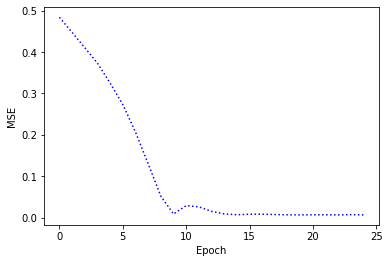

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(history.history['mean_squared_error'], ':b',label='MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()
plt.clf()

In [11]:
model.evaluate(X_val, Y_val, verbose=1)

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - mean_squared_error: 0.0064


[0.006419364362955093, 0.006419364362955093]

In [12]:
test_output = model.predict(X, verbose=1)

4/4 [==============================] - 0s 5ms/step


In [13]:
MSE = round(mean_squared_error(Y[:, 0], test_output[:, 0]),4)
print(MSE)

0.0069


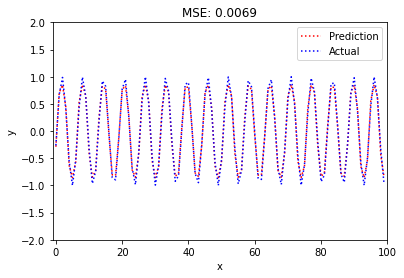

In [14]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 100)
plt.ylim(-2, 2)
plt.title('MSE: {}'.format(MSE))
plt.plot(test_output[:, 0], ':r', label='Prediction')
plt.plot(Y[:, 0], ':b', label='Actual')
plt.legend();
#plt.savefig('/Users/austinschladant/Anaconda/Project2/pred.png', dpi=600)
plt.show()

In [15]:
'''
Uncomment to save graphs

for i in range(0, 100, 5):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-1, 100)
    plt.ylim(-2, 2)
    plt.title('MSE: {}'.format(MSE))
    plt.plot(test_output[:i, 0], 'r', label='Prediction')
    plt.plot(Y[:, 0], ':b', label='Actual')
    plt.legend();
    plt.savefig('/Users/pred{}.png'.format(i)
                , dpi=600)
    plt.clf()
    
'''

"\nUncomment to save graphs\n\nfor i in range(0, 100, 5):\n    plt.xlabel('x')\n    plt.ylabel('y')\n    plt.xlim(-1, 100)\n    plt.ylim(-2, 2)\n    plt.title('MSE: {}'.format(MSE))\n    plt.plot(test_output[:i, 0], 'r', label='Prediction')\n    plt.plot(Y[:, 0], ':b', label='Actual')\n    plt.legend();\n    plt.savefig('/Users/austinschladant/Anaconda/Project2/pred{}.png'.format(i)\n                , dpi=600)\n    plt.clf()\n    \n"